In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

nltk.download()
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

from wordcloud import WordCloud,STOPWORDS

import seaborn as sns
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [60]:
df = pd.read_csv(r"C:\Users\arun_\spam.csv")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [61]:
df = df.iloc[:,:2]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<AxesSubplot:>

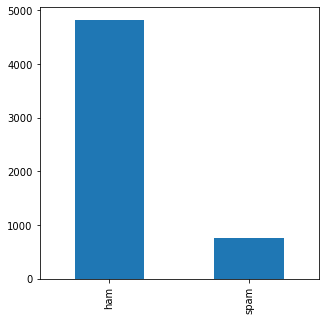

In [62]:
df['v1'].value_counts().plot(kind='bar',figsize=(5,5))

In [63]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

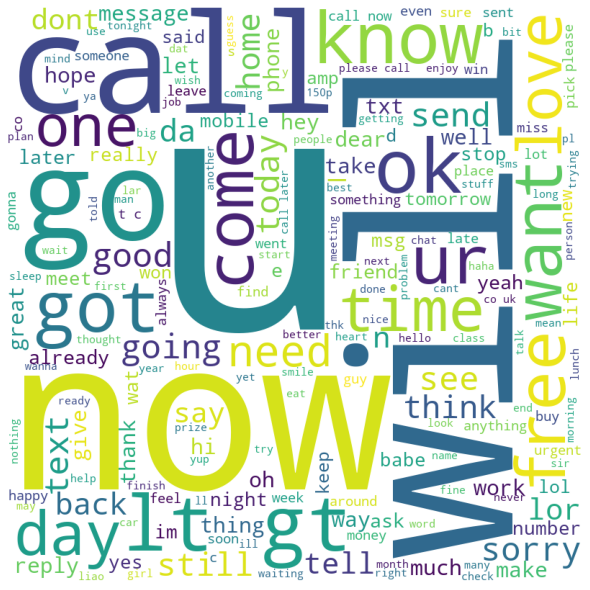

In [64]:
comment_words = ''
stopwords = set(STOPWORDS)
 
for val in df['v2']:
    val = str(val)

    tokens = val.split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


In [80]:
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arun_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arun_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [83]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arun_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
remove_words = list(stopwords.words('english'))+list(punctuation)
final_corpus = []

from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

for i in range(len(data)):
    word = word_tokenize(data['v2'][i].lower())
    word = [stemmer.stem(y) for y in word if y not in remove_words]
    j = " ".join(word)
    final_corpus.append(j)

# Models

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Logical Regression

In [33]:
lr = LogisticRegression()
lr.fit(X_train , y_train)
pred1 = lr.predict(X_test)
from sklearn import metrics
metrics.confusion_matrix(pred1 , y_test)
print(metrics.classification_report(pred1 , y_test))

              precision    recall  f1-score   support

         ham       1.00      0.94      0.97      1017
        spam       0.63      0.96      0.76        98

    accuracy                           0.95      1115
   macro avg       0.81      0.95      0.86      1115
weighted avg       0.96      0.95      0.95      1115



SVC

In [34]:
svc = SVC()
svc.fit(X_train, y_train)
pred2 = svc.predict(X_test)
print(metrics.classification_report(y_test, pred2))
print(metrics.confusion_matrix(y_test, pred2))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       0.99      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115

[[964   1]
 [ 29 121]]


Decision Tree

In [27]:
tree = DecisionTreeClassifier(random_state=0, max_features='auto')
tree.fit(X_train, y_train)
pred3 = tree.predict(X_test)
print(metrics.classification_report(y_test,pred3))

              precision    recall  f1-score   support

         ham       0.97      0.99      0.98       965
        spam       0.93      0.83      0.87       150

    accuracy                           0.97      1115
   macro avg       0.95      0.91      0.93      1115
weighted avg       0.97      0.97      0.97      1115



Random Forest

In [29]:
rfc = RandomForestClassifier(random_state=5)
rfc.fit(X_train, y_train)
pred4 = rfc.predict(X_test)
print(metrics.classification_report(y_test, pred4))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

